<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/Js9_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Muhammad Rafif Pasya(4.33.23.1.18)**

Dengan menggunakan pengetahuan tentang RNN dan LSTM pada bab ini, silakan susun Deep Neural Network sendiri untuk memprediksi pada dataset timeseries berikut:
https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231

In [15]:
# 1. Import Library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

In [16]:
# 2. Load dan persiapkan data
df = pd.read_csv("AABA_2006-01-01_to_2018-01-01.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
close_data = df["Close"].values.reshape(-1, 1)

In [17]:

# 3. Normalisasi data
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_data)


In [18]:
# 4. Membuat dataset dengan window size
# Dataset window
def create_dataset(data, window_size=50):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = create_dataset(scaled_close, window_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
# 5. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [20]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer="adam", loss="mean_squared_error")
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0161 - val_loss: 0.0016
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 4.7219e-04 - val_loss: 4.9414e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 4.5915e-04 - val_loss: 9.0002e-04
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 4.1241e-04 - val_loss: 9.5146e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.8957e-04 - val_loss: 5.2892e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 3.5071e-04 - val_loss: 0.0019
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 4.6350e-04 - val_loss: 6.1302e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 3.3692e-04 - val_loss: 4.8661e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 3.1473e-04 - val_loss: 3.8544e-04
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.0430e-04 - val_loss: 3.9630e-04
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 2.7370e-04 - val_loss: 9.2145e-0

In [21]:
#MODEl rnn
model_rnn = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(window_size, 1)),
    SimpleRNN(50),
    Dense(1)
])
model_rnn.compile(optimizer="adam", loss="mean_squared_error")
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0307 - val_loss: 0.0039
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.4148e-04 - val_loss: 0.0029
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 3.5065e-04 - val_loss: 0.0014
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.7715e-04 - val_loss: 0.0012
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.2057e-04 - val_loss: 4.1406e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.8008e-04 - val_loss: 8.1859e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.5221e-04 - val_loss: 3.0063e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.4626e-04 - val_loss: 5.5208e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.8874e-04 - val_loss: 8.5665e-04
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.0356e-04 - val_loss: 0.0017
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0973e-04 - val_loss: 6.7506e-04

In [22]:
#model gru
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(window_size, 1)),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer="adam", loss="mean_squared_error")
model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0124 - val_loss: 2.5949e-04
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 2.2693e-04 - val_loss: 2.6023e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.8591e-04 - val_loss: 2.3481e-04
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 1.5837e-04 - val_loss: 2.4513e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 1.5911e-04 - val_loss: 2.1190e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1.3579e-04 - val_loss: 1.9644e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 1.4935e-04 - val_loss: 1.8941e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.2357e-04 - val_loss: 3.9968e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1.1393e-04 - val_loss: 2.3500e-04
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 1.1157e-04 - val_loss: 2.5505e-04
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1.0105e-04 - 

In [23]:
#model CNN
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_cnn.compile(optimizer="adam", loss="mean_squared_error")
model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0119 - val_loss: 0.0042
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.4405e-04 - val_loss: 0.0016
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1850e-04 - val_loss: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5814e-04 - val_loss: 0.0017
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3257e-04 - val_loss: 7.1690e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0837e-04 - val_loss: 9.1190e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8626e-04 - val_loss: 5.4380e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9075e-04 - val_loss: 4.3222e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4229e-04 - val_loss: 4.0621e-04
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5607e-04 - val_loss: 4.3826e-04
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3111e-04 - val_loss: 5.4454e-04
Epoch 12/20
75/7

In [24]:
# 7. Training model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 1.9384e-04 - val_loss: 3.0314e-04
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1.8430e-04 - val_loss: 5.1466e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.8572e-04 - val_loss: 1.9980e-04
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 1.5868e-04 - val_loss: 2.1896e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.6860e-04 - val_loss: 1.7883e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.6409e-04 - val_loss: 2.0275e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.5633e-04 - val_loss: 3.9962e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.4362e-04 - val_loss: 1.6106e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.3174e-04 - val_loss: 2.6311e-04
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.4786e-04 - val_loss: 5.4332e-04
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 1.3839e-0

In [25]:
# 8. Evaluasi dan prediksi
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inverse = scaler.inverse_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


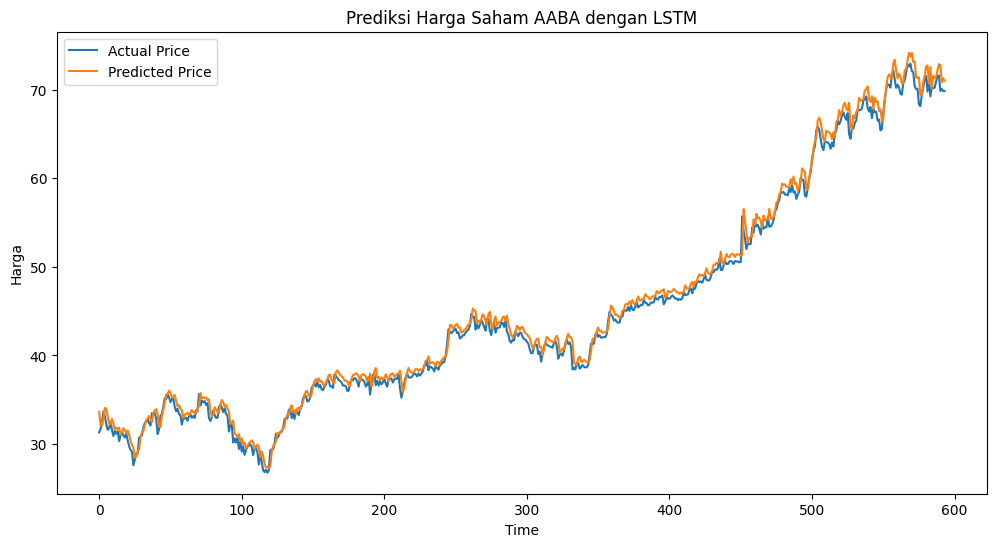

In [26]:
# 9. Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Prediksi Harga Saham AABA dengan LSTM')
plt.xlabel('Time')
plt.ylabel('Harga')
plt.legend()
plt.show()
